<a href="https://colab.research.google.com/github/ninja03jod/Machine_Learning_Projects/blob/main/ML_model_Predict_Heart_Diesease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/sample_data/framingham.csv")
df[:3]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


In [6]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [19]:
fill_value = {"education":1.97,"cigsPerDay":5,"BPMeds":0.02,"totChol":236.72,"BMI":25.80,"heartRate":75.87,"glucose":81.96}

In [18]:
df.mean()

male                 0.429212
age                 49.584946
education            1.978950
currentSmoker        0.494101
cigsPerDay           9.003089
BPMeds               0.029630
prevalentStroke      0.005899
prevalentHyp         0.310524
diabetes             0.025720
totChol            236.721585
sysBP              132.352407
diaBP               82.893464
BMI                 25.802008
heartRate           75.878924
glucose             81.966753
TenYearCHD           0.151958
dtype: float64

In [ ]:
df = df.fillna(fill_value)

In [22]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [8]:
# check the output
df["TenYearCHD"].value_counts()
# 1 - yes
# 0 - No

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [23]:
x = df.iloc[:,:-1]
x[:2]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0


In [24]:
y = df['TenYearCHD']
y[:2]

0    0
1    0
Name: TenYearCHD, dtype: int64

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,precision_score,accuracy_score,confusion_matrix,f1_score

In [14]:
model = LogisticRegression()
model

LogisticRegression()

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,random_state=42)
# random state is used to get the constat record of training and testig without shuffle
# if we use shuffle = True then it gives different record per each execution

In [26]:
model.fit(x_train,y_train)

LogisticRegression()

In [28]:
y_pred = model.predict(x_test)
y_pred[:2]

array([0, 0])

In [29]:
# actual
y_test[:2]

3188    0
764     0
Name: TenYearCHD, dtype: int64

In [30]:
len(x)

4238

In [31]:
# 70 % data in training
4238 * 0.7

2966.6

In [32]:
# len of x_train woould be 2966 or 67
len(x_train)

2966

In [36]:
4238*0.3

1271.3999999999999

In [37]:
len(x_test)

1272

In [34]:
# data accuracy:
model.score(x,y)*100

85.01651722510618

In [33]:
# model performance measures / metrics :
accuracy_score(y_pred,y_test)

0.8553459119496856

In [35]:
confusion_matrix(y_test,y_pred)

array([[1077,    7],
       [ 177,   11]])

<Axes: >

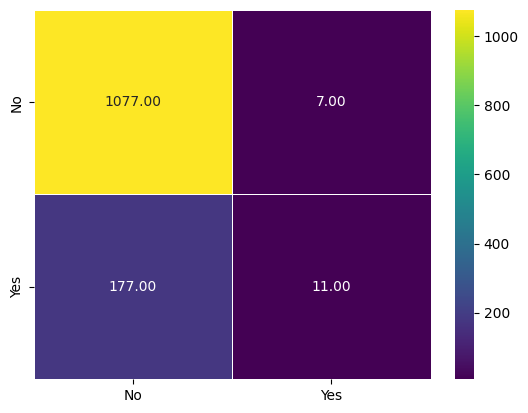

In [51]:
sns.heatmap(data=confusion_matrix(y_test,y_pred),fmt=".2f",cmap="viridis",xticklabels=["No","Yes"],yticklabels=["No","Yes"],annot=True,linewidth=.5,linecolor="white")

In [101]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 28.4 MB/s eta 0:00:00


In [104]:
import sweetviz as sv
# used to get the eploratory data analysis over ecah columns

In [108]:
report = sv.analyze(df)
report

                                             |          | [  0%]   00:00 -> (? left)


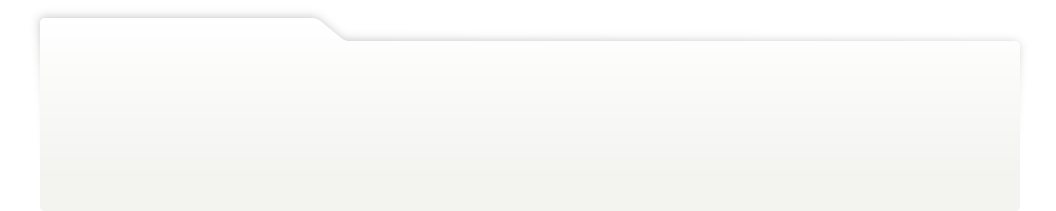
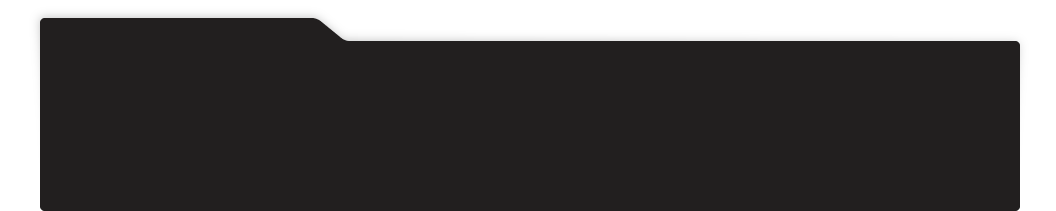
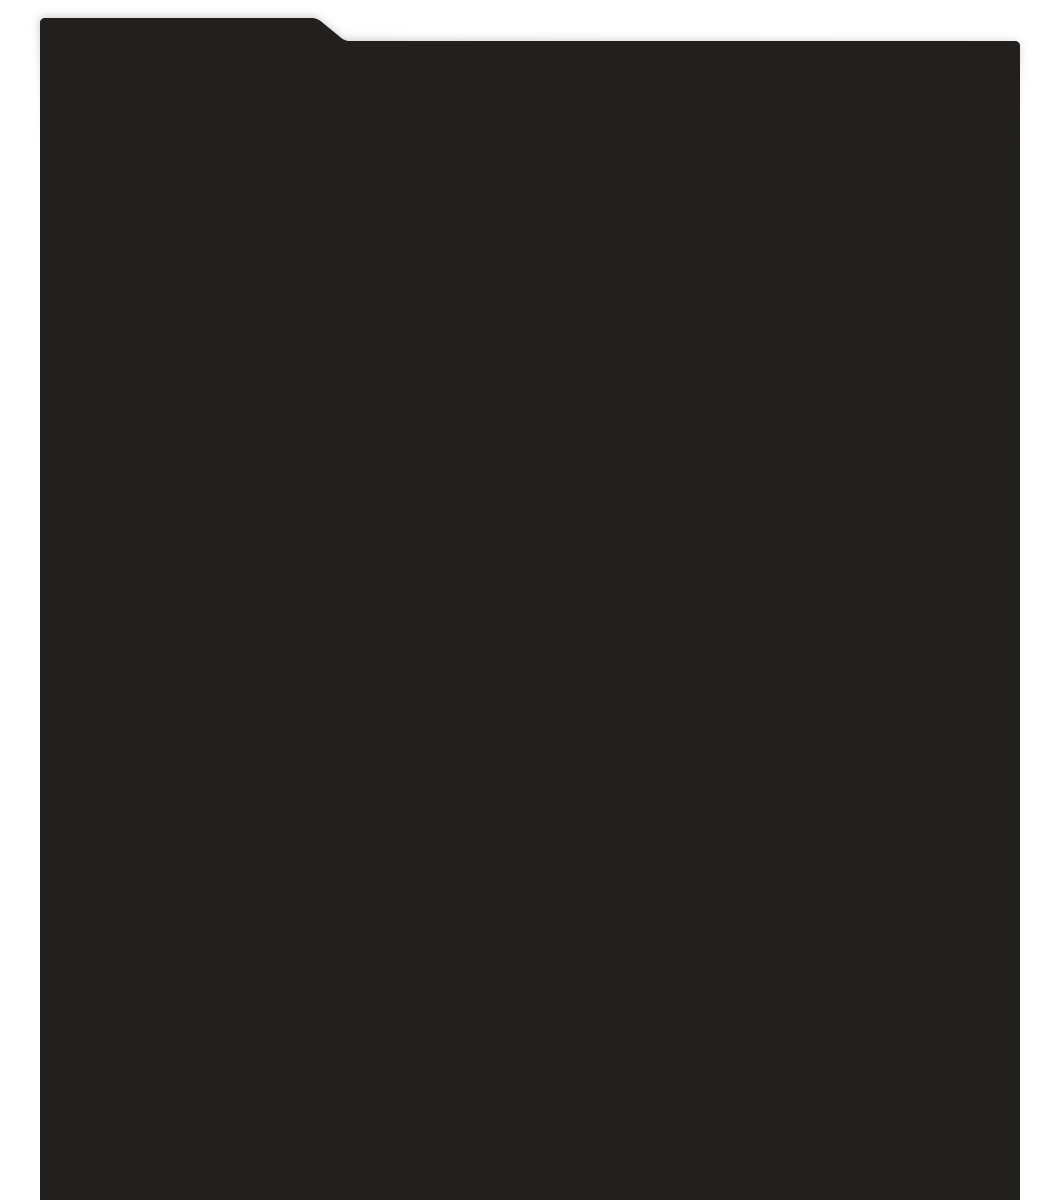
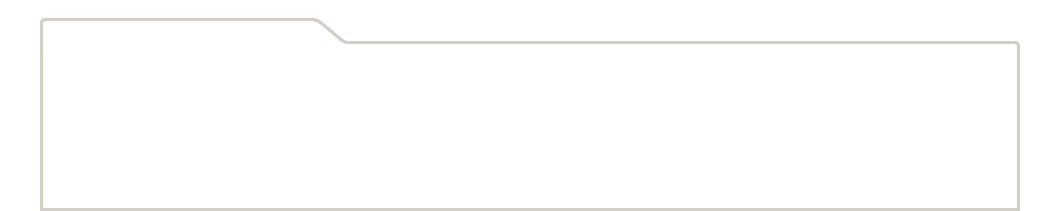
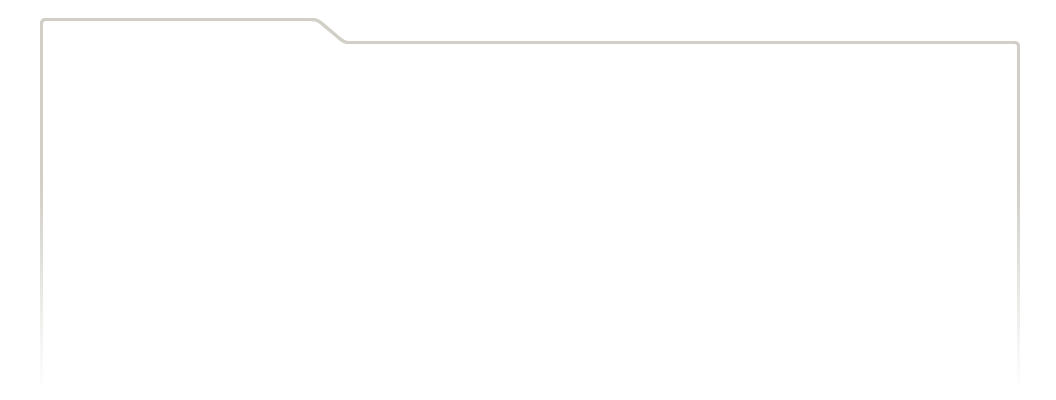
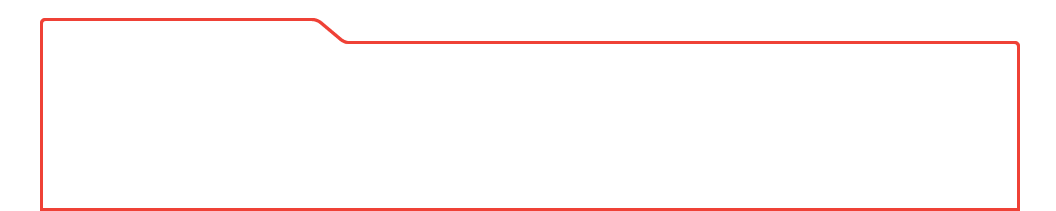
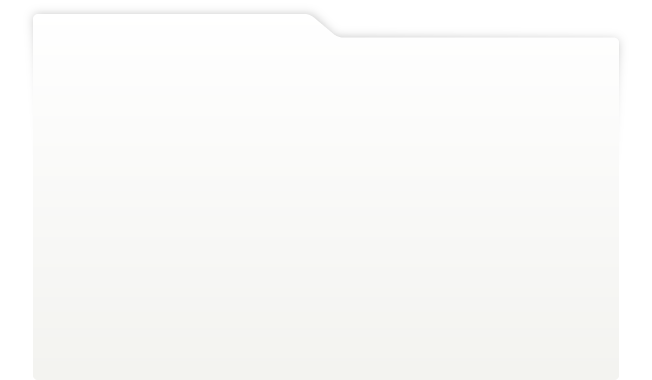
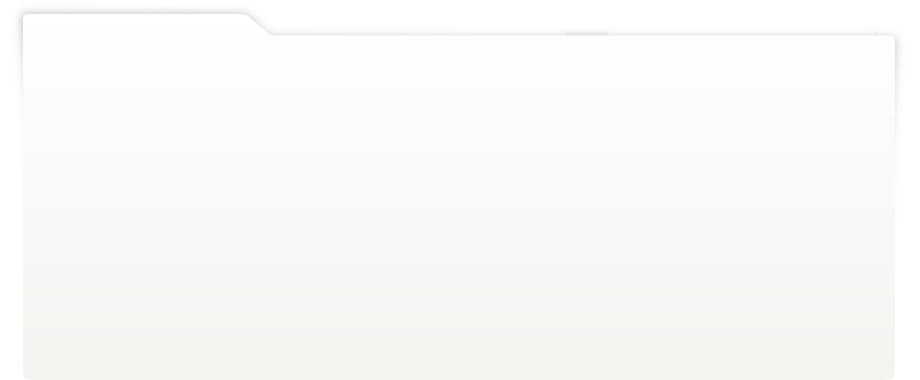
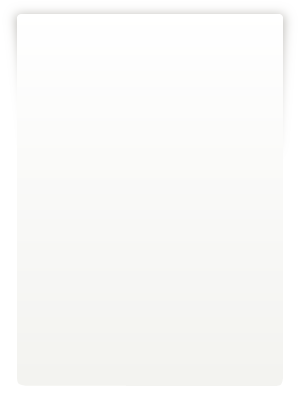
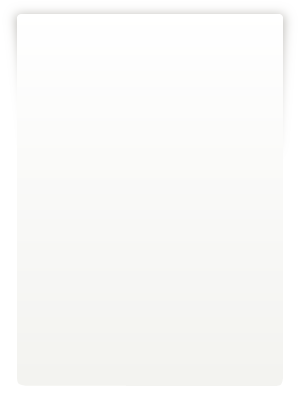
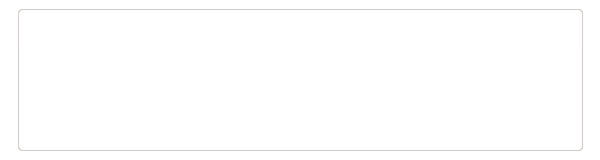
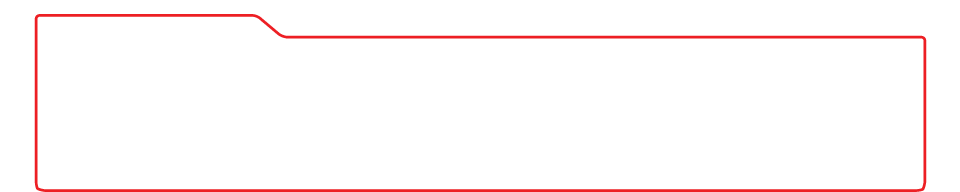
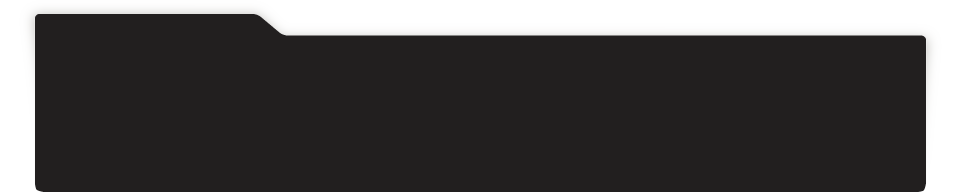
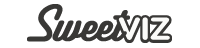
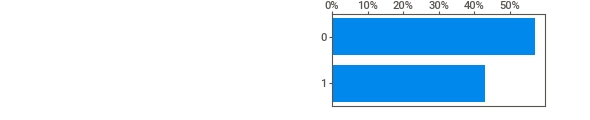
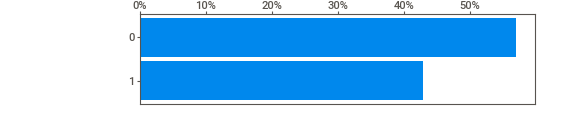
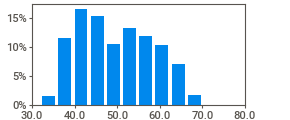
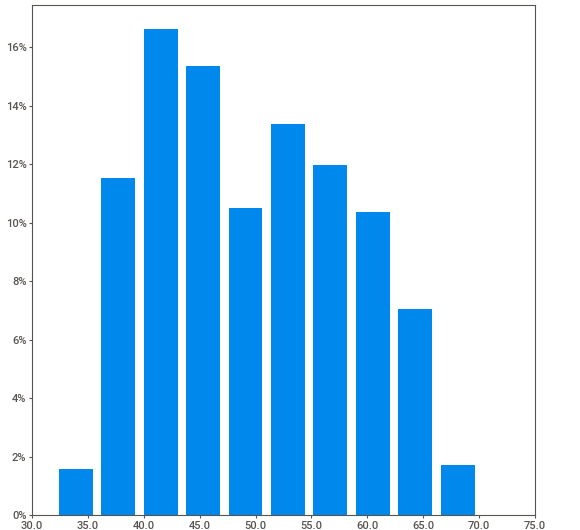
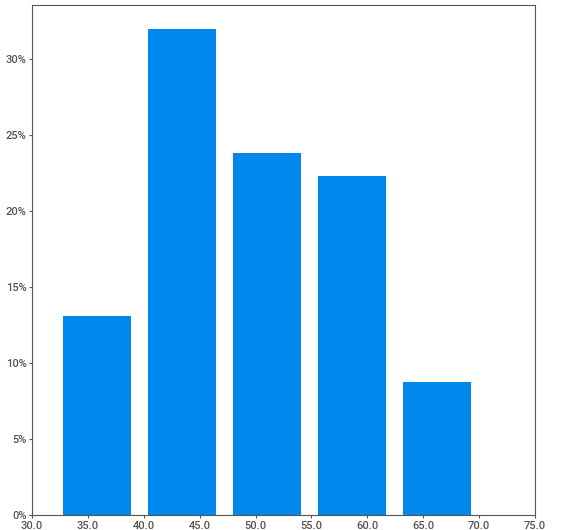
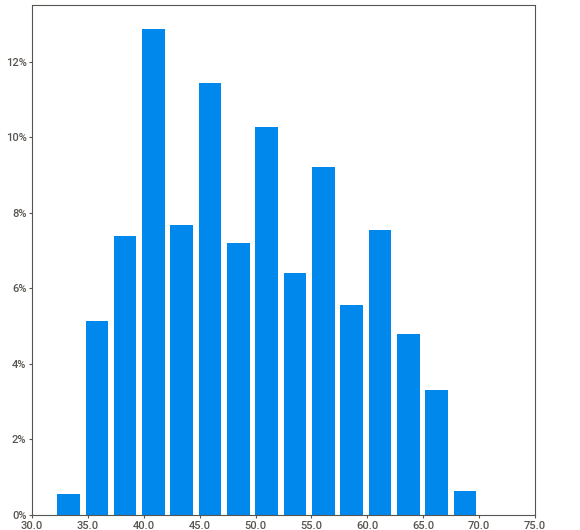
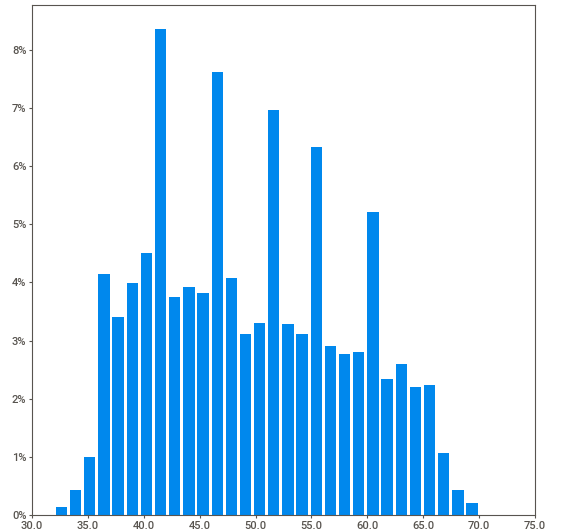
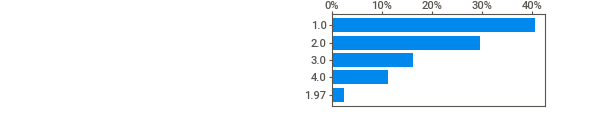
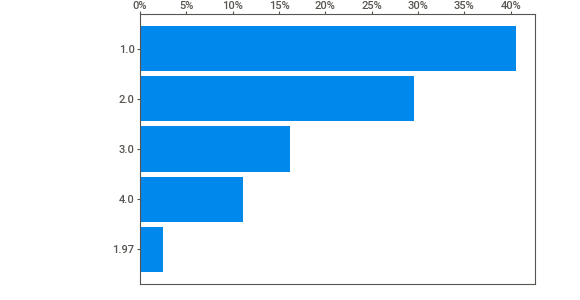
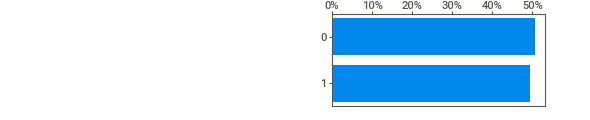
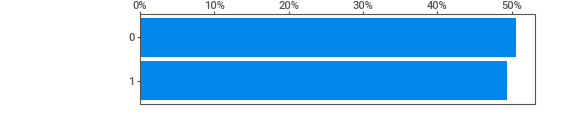
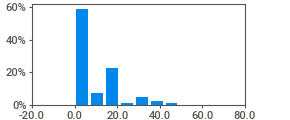
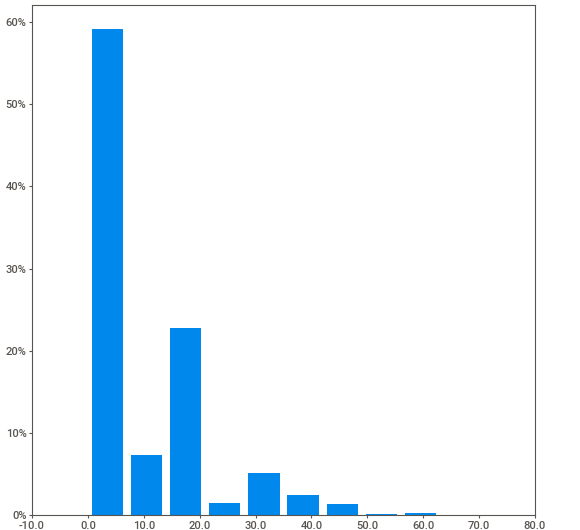
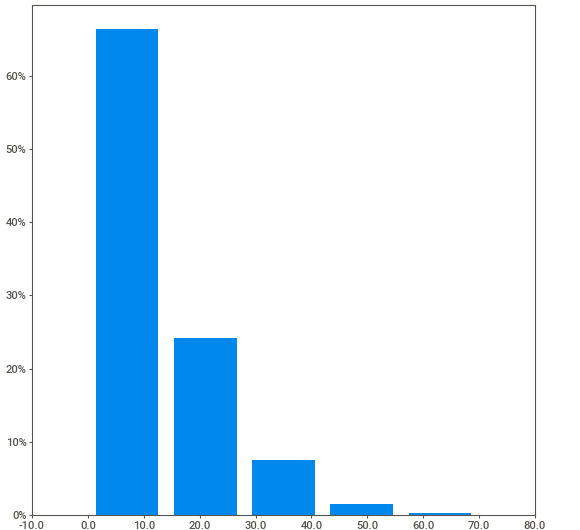
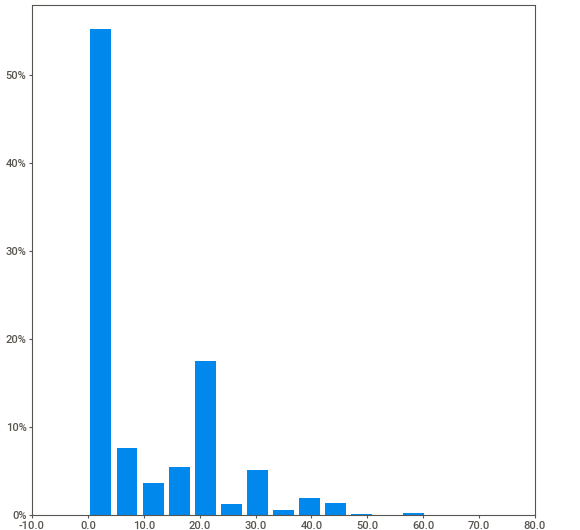
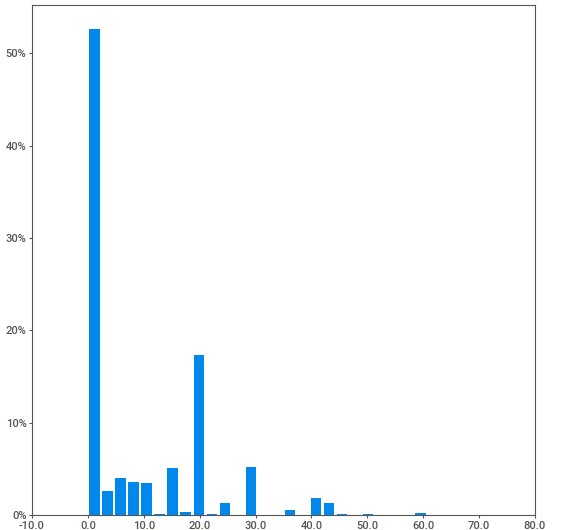
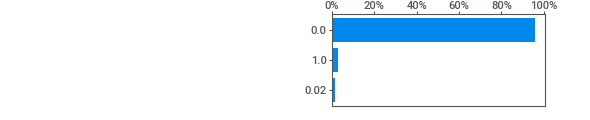
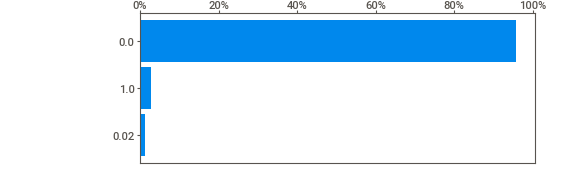
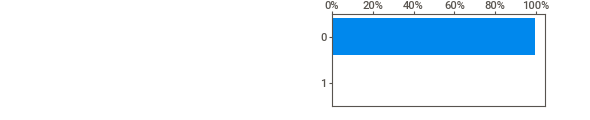
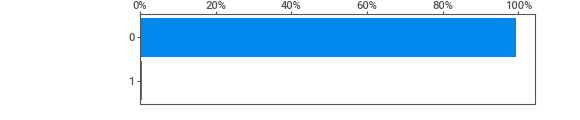
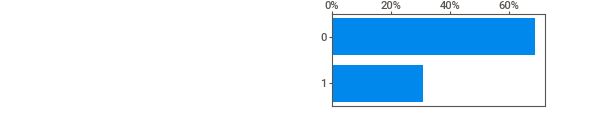
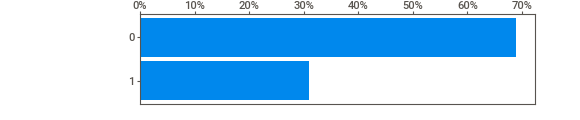
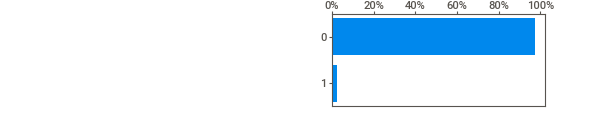
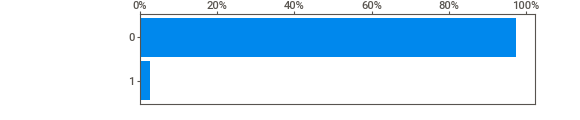
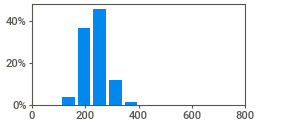
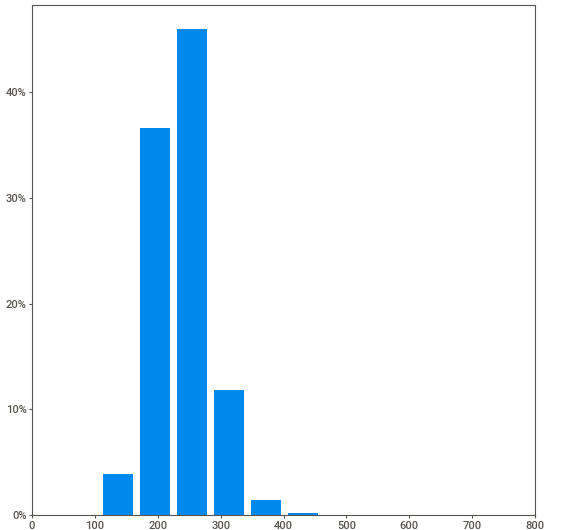
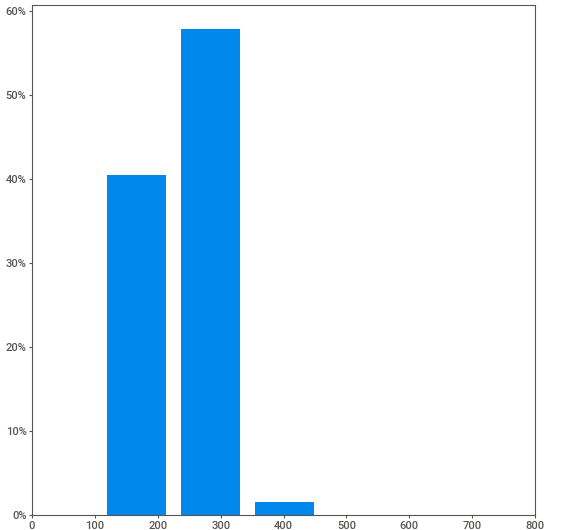
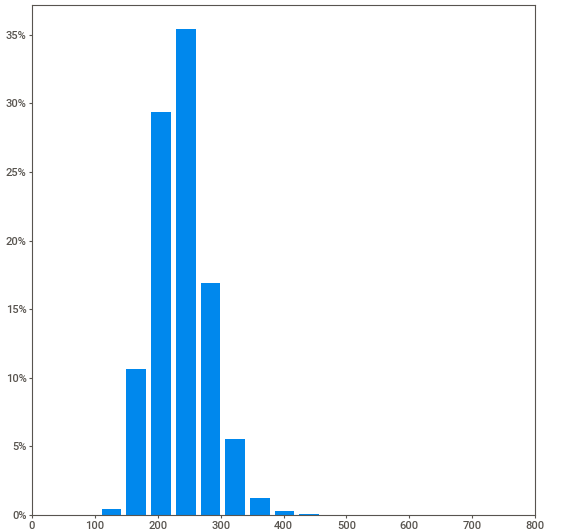
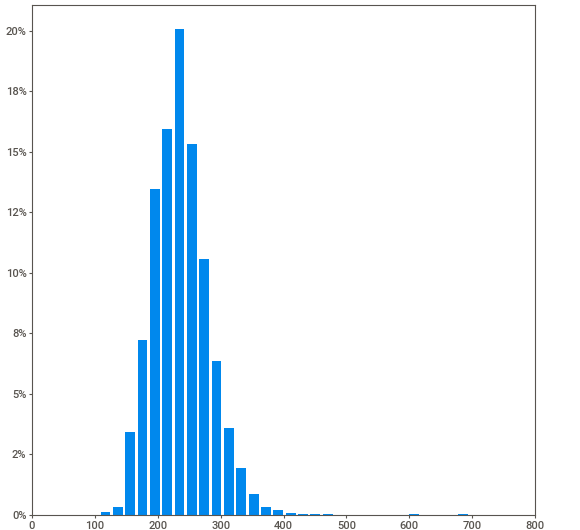
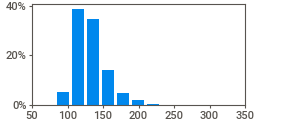
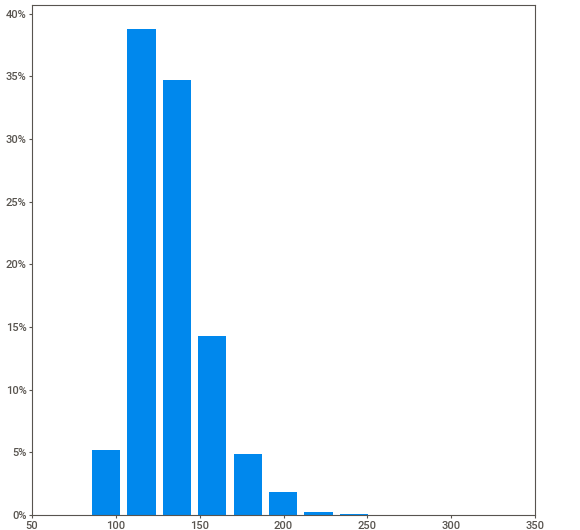
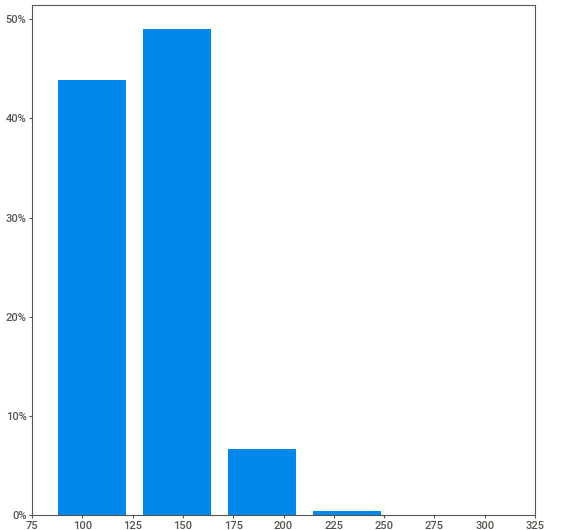
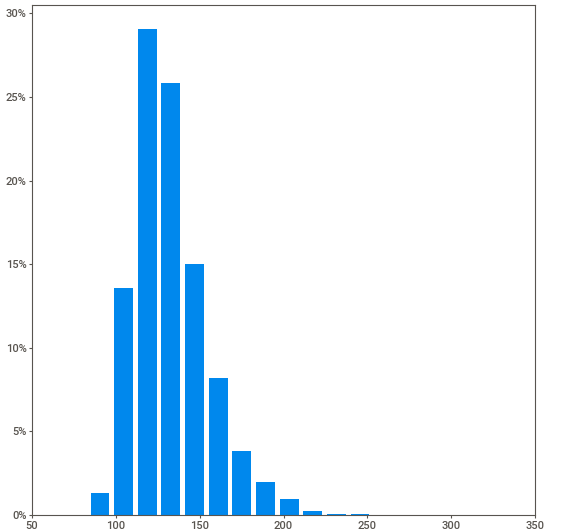
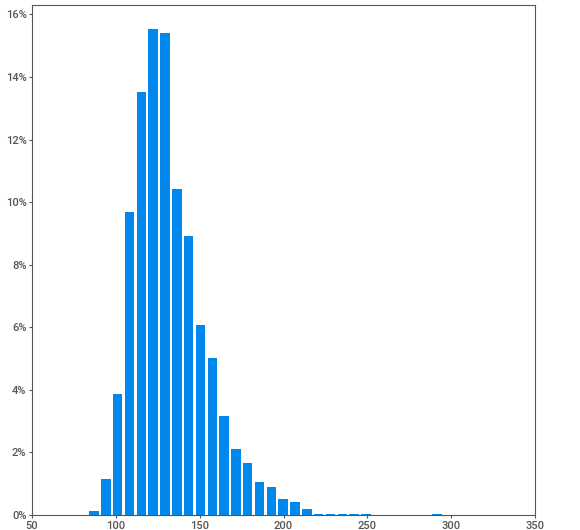
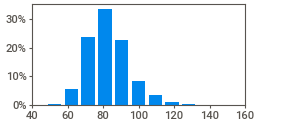
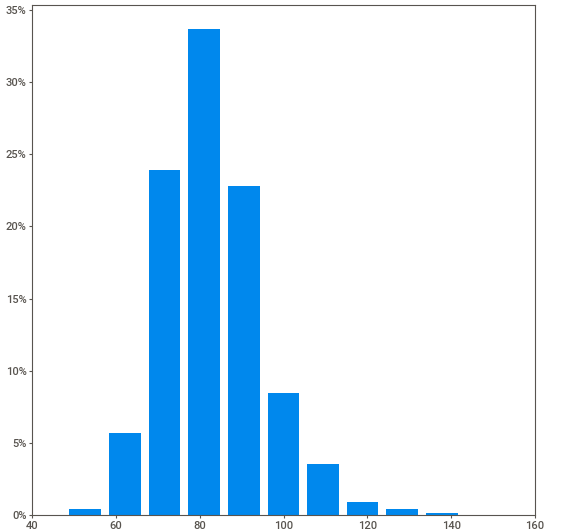
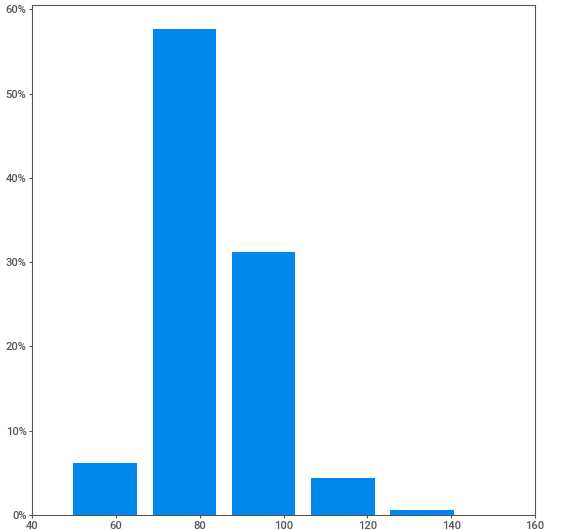
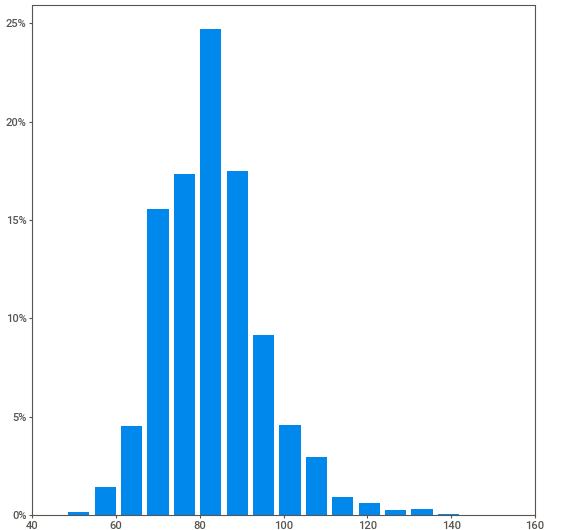
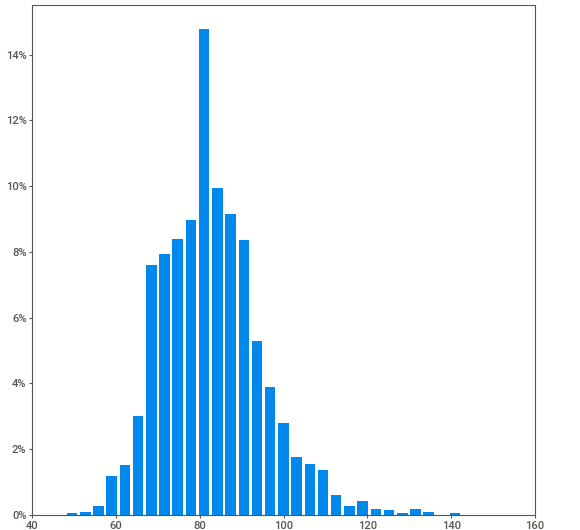
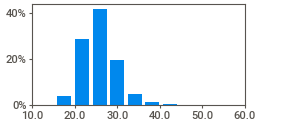
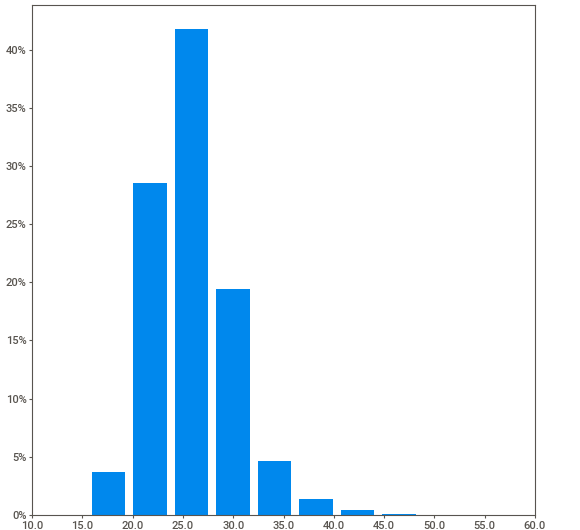
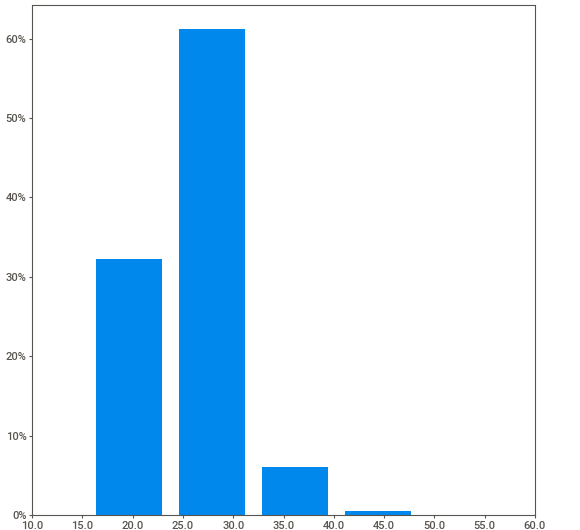
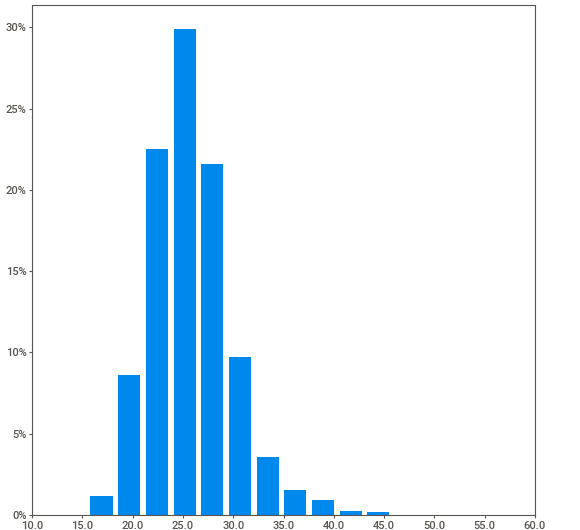
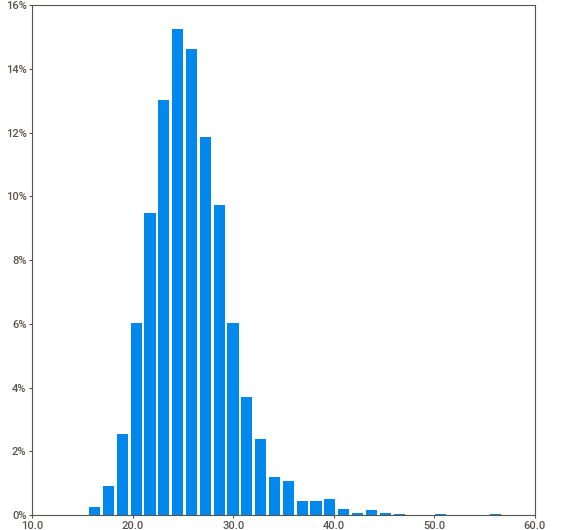
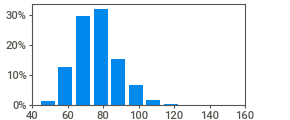
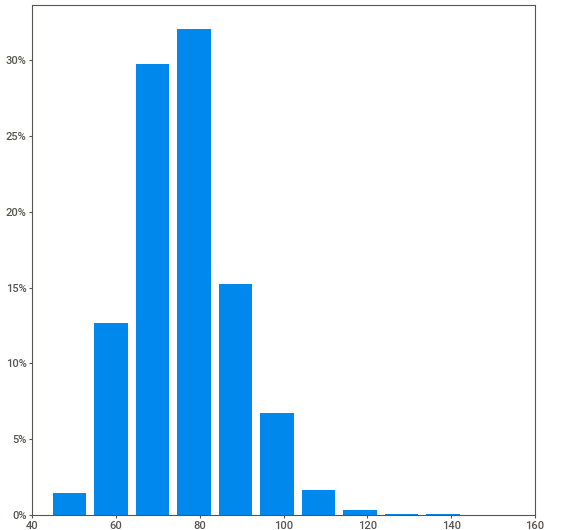
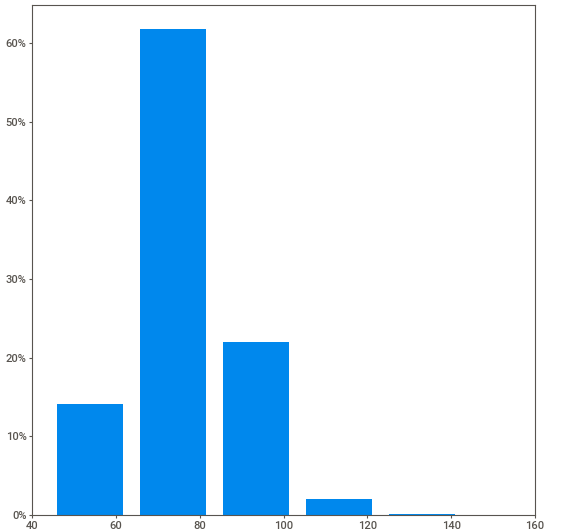
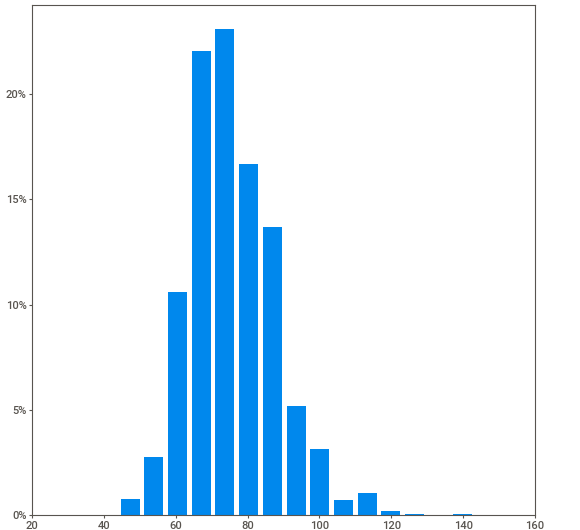
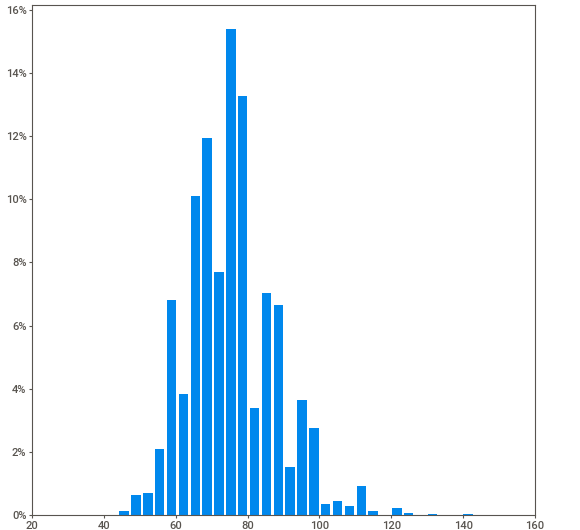
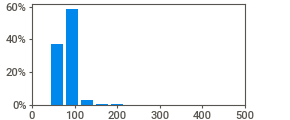
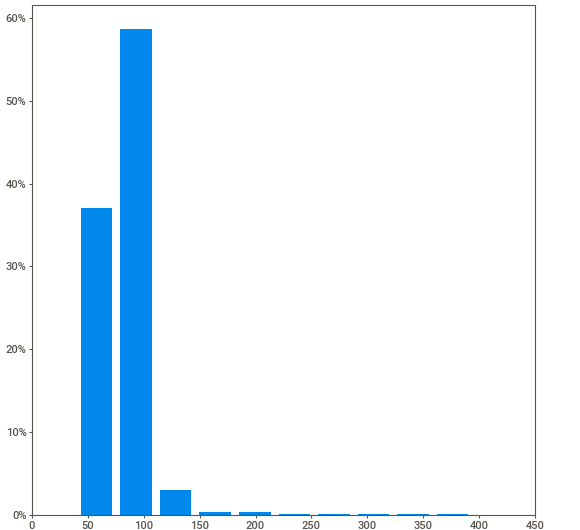
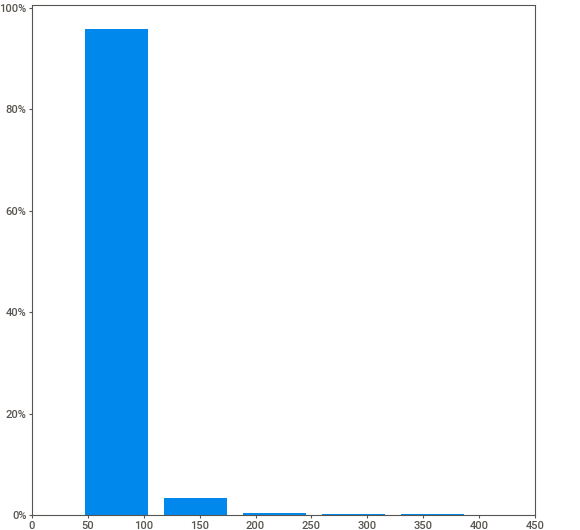
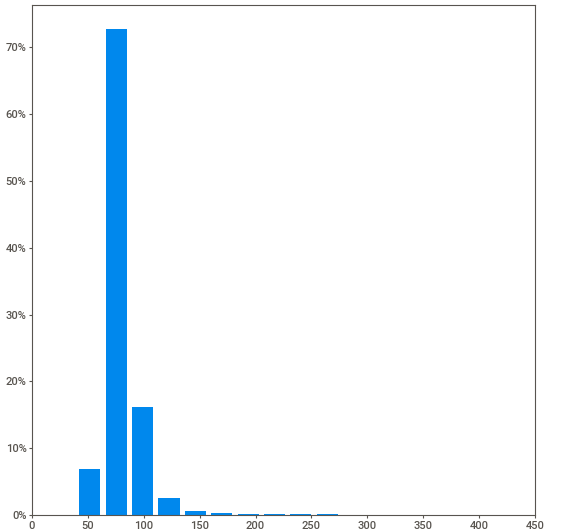
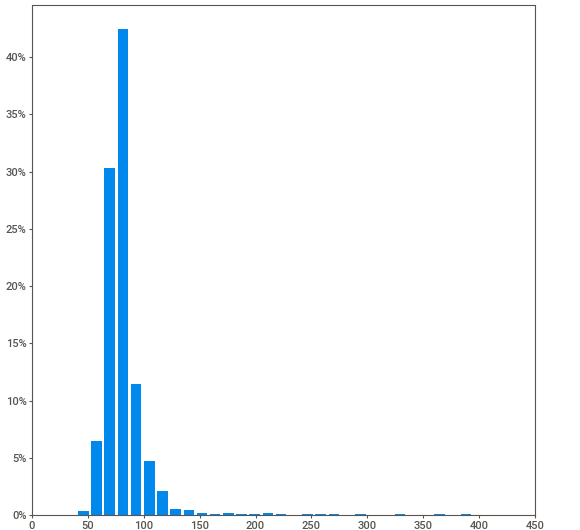
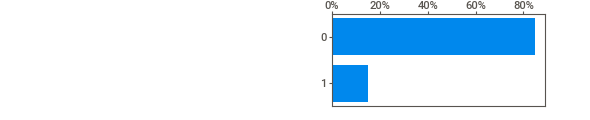
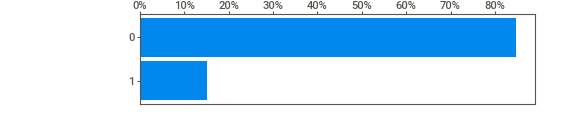
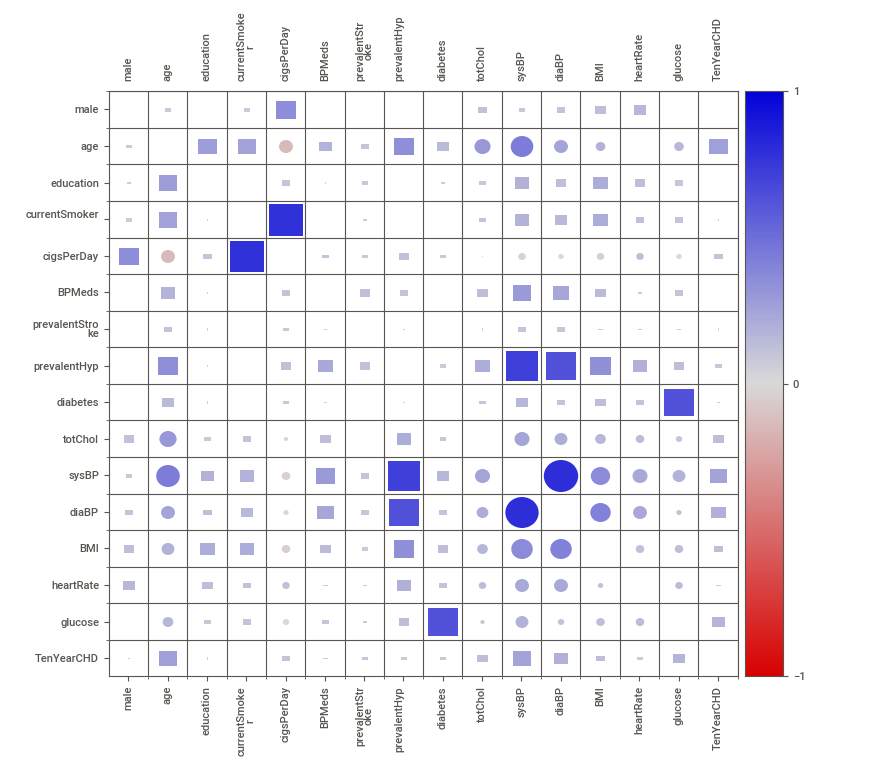
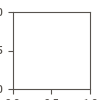

In [110]:
report.show_notebook()

In [39]:
precision_score(y_test,y_pred)

0.6111111111111112

In [40]:
recall_score(y_test,y_pred)

0.05851063829787234

In [43]:
f1_score(y_test,y_pred)

0.10679611650485436

In [61]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.00,0,0,0,195.0,106.0,70.0,26.97,80.0,77.00,0
1,0,46,2.0,0,0.0,0.00,0,0,0,250.0,121.0,81.0,28.73,95.0,76.00,0
2,1,48,1.0,1,20.0,0.00,0,0,0,245.0,127.5,80.0,25.34,75.0,70.00,0
3,0,61,3.0,1,30.0,0.00,0,1,0,225.0,150.0,95.0,28.58,65.0,103.00,1
4,0,46,3.0,1,23.0,0.00,0,0,0,285.0,130.0,84.0,23.10,85.0,85.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.00,0,1,0,313.0,179.0,92.0,25.97,66.0,86.00,1
4234,1,51,3.0,1,43.0,0.00,0,0,0,207.0,126.5,80.0,19.71,65.0,68.00,0
4235,0,48,2.0,1,20.0,0.02,0,0,0,248.0,131.0,72.0,22.00,84.0,86.00,0
4236,0,44,1.0,1,15.0,0.00,0,0,0,210.0,126.5,87.0,19.16,86.0,81.96,0


In [64]:
new = pd.DataFrame({"Actual":y_test,"predicted":y_pred})
new

,Actual,predicted
3188,0,0
764,0,0
3264,0,0
1967,0,0
2185,0,0
...,...,...
610,1,0
570,0,0
343,1,0
2159,0,0


<Axes: >

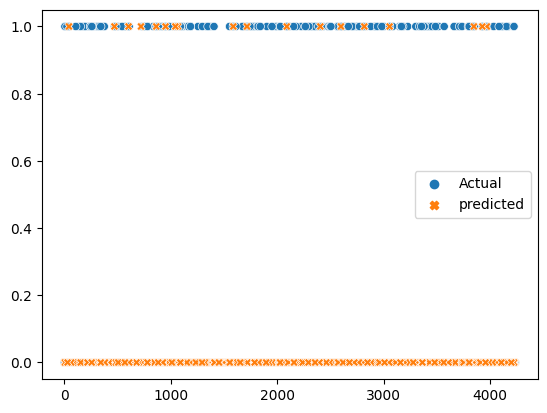

In [65]:
sns.scatterplot(data=new)

In [66]:
df[:5]

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<Axes: xlabel='totChol'>

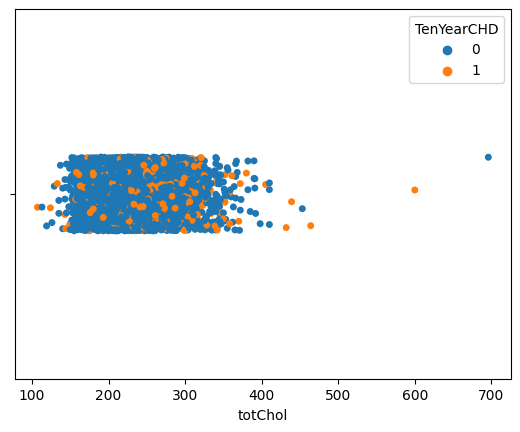

In [73]:
sns.stripplot(data=df,x='totChol',hue='TenYearCHD')

<Axes: xlabel='count', ylabel='TenYearCHD'>

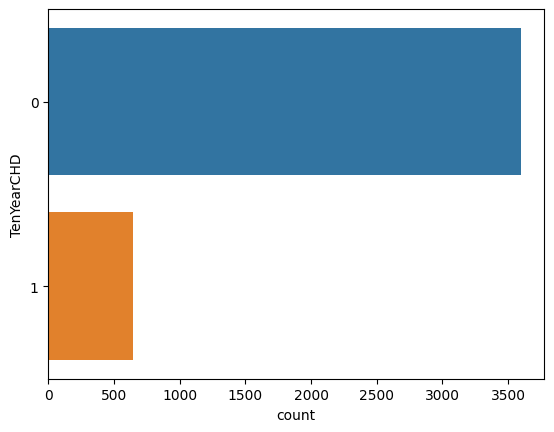

In [74]:
sns.countplot(data=df,y='TenYearCHD')

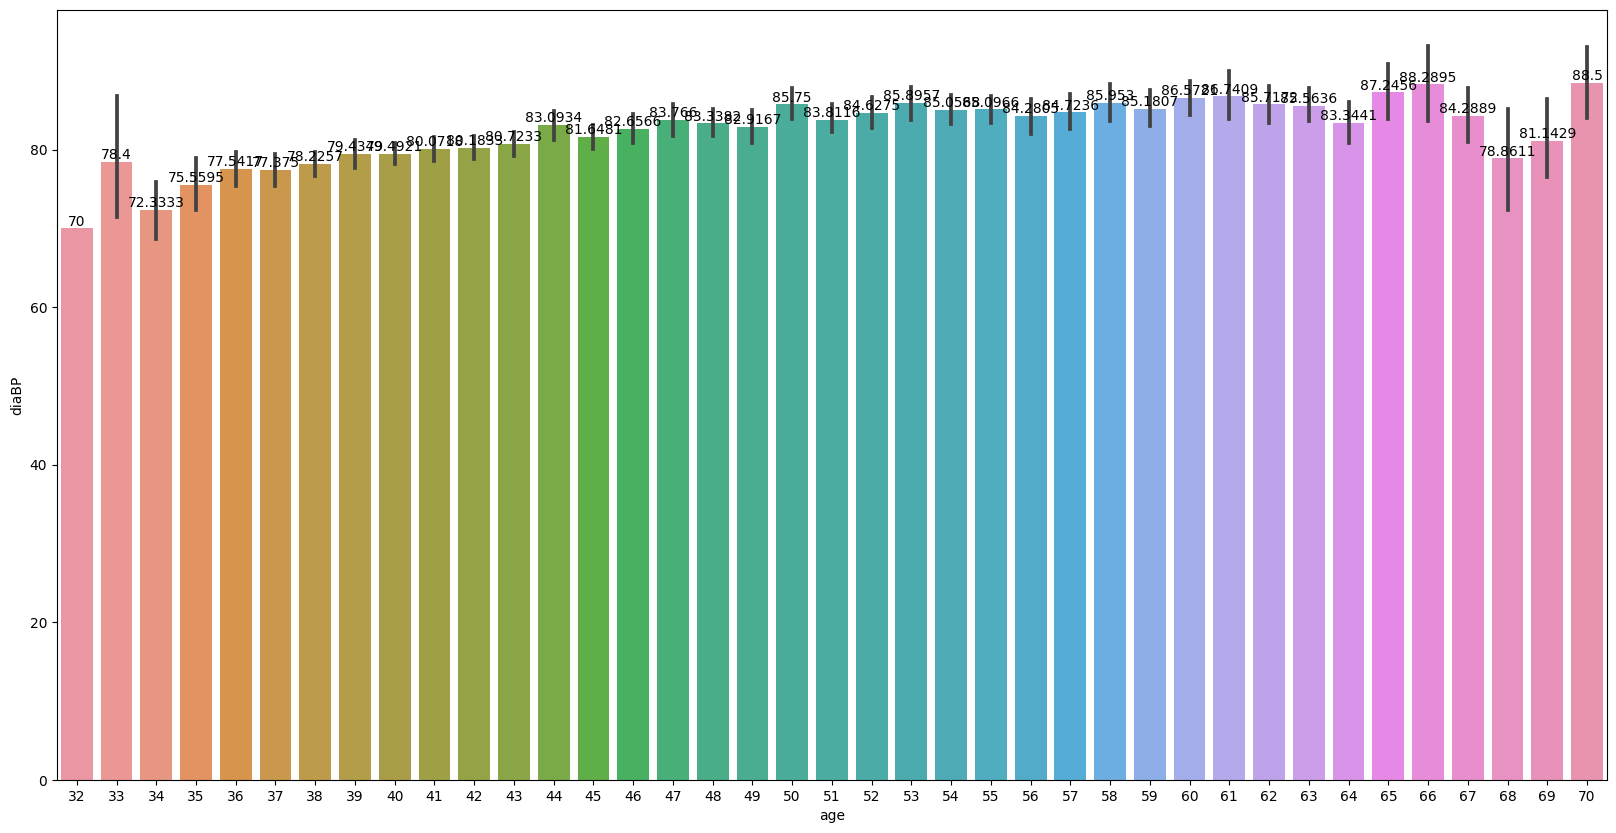

In [81]:
# plot Age wise diabetes:
plt.figure(figsize=(20,10))
bar = sns.barplot(data=df,x="age",y="diaBP")

for i in bar.containers:
  plt.bar_label(i)